## Inspecting the regression data
The dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a public Kaggle competition.

In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.

                  AAPL          FB        NFLX          V        XOM
time                                                                
2010-01-04  214.009998         NaN   53.479999  88.139999  69.150002
2010-01-05  214.379993         NaN   51.510001  87.129997  69.419998
2010-01-06  210.969995         NaN   53.319999  85.959999  70.019997
2010-01-07  210.580000         NaN   52.400001  86.760002  69.800003
2010-01-08  211.980005         NaN   53.300002  87.000000  69.519997
...                ...         ...         ...        ...        ...
2016-12-23  116.519997  117.269997  125.589996  78.150002  90.709999
2016-12-27  117.260002  118.010002  128.350006  78.349998  90.750000
2016-12-28  116.760002  116.919998  125.889999  78.300003  90.300003
2016-12-29  116.730003  116.349998  125.330002  78.330002  90.349998
2016-12-30  115.820000  115.050003  123.800003  78.019997  90.260002

[1762 rows x 5 columns]


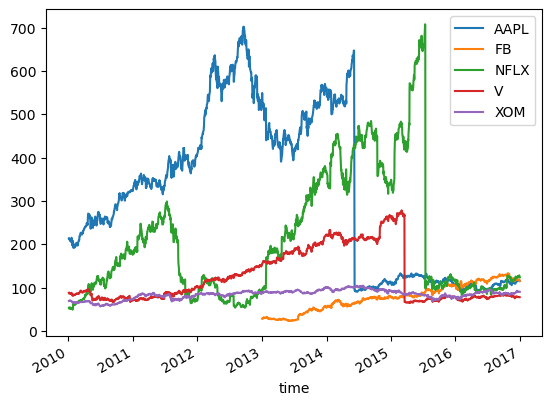

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
prices = pd.read_csv('Downloads/prices_nyse.csv', index_col =0)

# Convert the index of the DataFrame to datetime
prices.index = pd.to_datetime(prices.index)
print(prices)
prices.asfreq('QS')
# Loop through each column, plot its values over time
fig, ax = plt.subplots()

for column in prices.columns:
    prices[column].plot(ax=ax, label=column)
ax.legend()
    

# Predicting data over time
Correlation and regression

Regression is similar to calculating correlation, with some key differences

 - Regression: A process that results in a formal model of the data
 - Correlation: A statistic that describes the data. Less information than regression model
 - Correlation between variables often changes over time
 - Time series often have patterns that change over time
 - Two timeseries that seem correlated at one moment may not remain so over time.

Scoring regression models
 - Two most common methods:
    - Correlation 
    - Coefficient of Determination


<Axes: xlabel='date'>

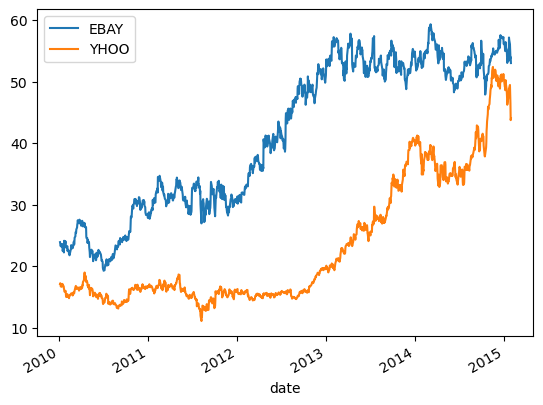

In [2]:
tsa_prices = pd.read_csv('Downloads/tsa_prices.csv', index_col=0, parse_dates = True)
tsa_prices.head()
tsa_prices.asfreq('Y')
tsa_prices.plot()


<Axes: xlabel='EBAY', ylabel='YHOO'>

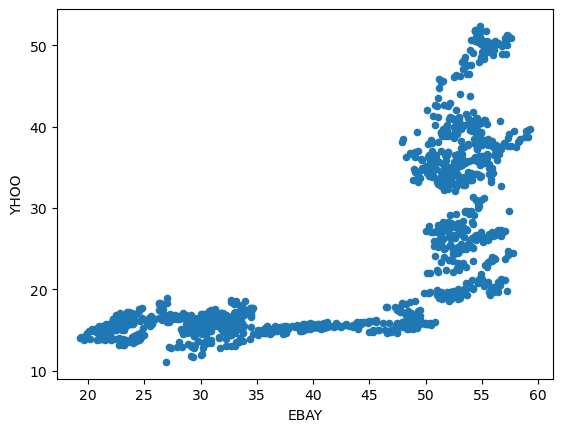

In [3]:
# Scatterplot with one company per axis
tsa_prices.plot.scatter('EBAY', 'YHOO')

<Axes: xlabel='EBAY', ylabel='YHOO'>

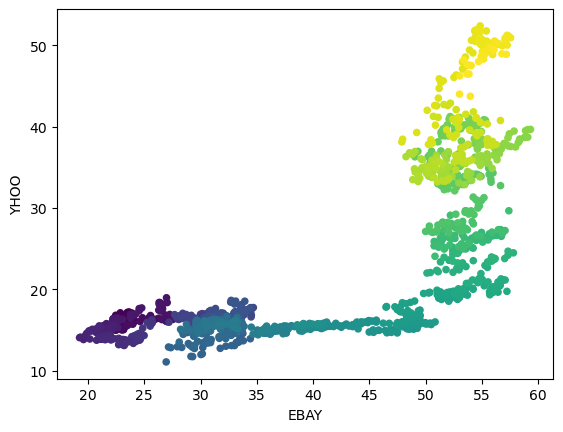

In [4]:
# Scatterplot with color relating to time
tsa_prices.plot.scatter('EBAY','YHOO', c = tsa_prices.index, cmap = plt.cm.viridis, colorbar = False)

## Fitting a simple regression model
Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo. Each of these is stored as a column in the all_prices DataFrame. Below is a mapping from company name to column name:

ebay: "EBAY"

nvidia: "NVDA"

yahoo: "YHOO"

apple: "AAPL"

We'll use these columns to define the input/output arrays in our model.

In [5]:
allprices = pd.read_csv('Downloads/all_prices.csv', index_col = 0, parse_dates = True)
allprices.head()

C:\Users\Ravi\AppData\Local\Temp\ipykernel_15888\1453999432.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  allprices = pd.read_csv('Downloads/all_prices.csv', index_col = 0, parse_dates = True)


,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,
2010-04-01,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,16.969999,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-05-01,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.740000,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-06-01,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-07-01,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,16.969999,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-08-01,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,16.920000,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = allprices[['EBAY', 'NVDA', 'YHOO']]
y = allprices['AAPL']

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


## Visualizing predicted values
When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables X and y) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

-0.33806972562289506


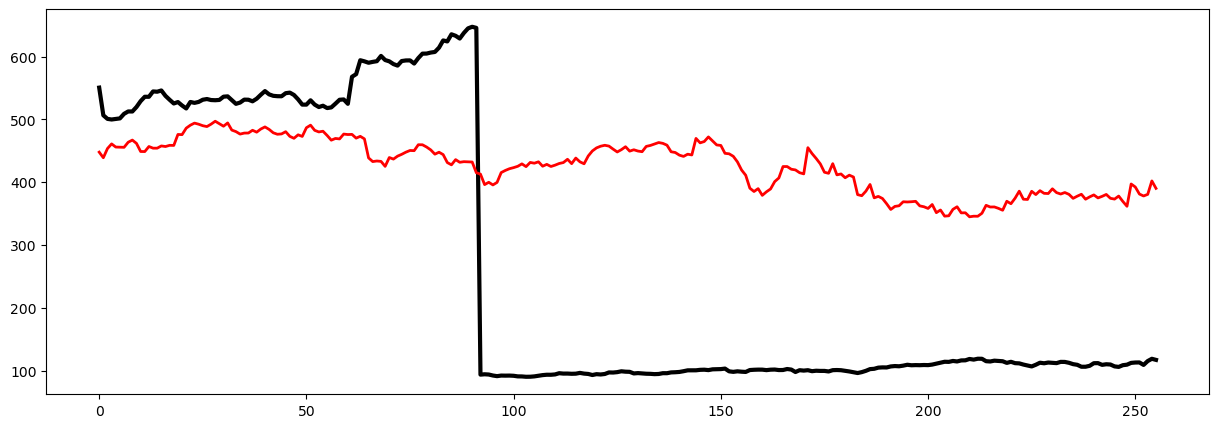

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =0.8, shuffle = False, random_state = 1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = r2_score(y_test, pred)
print(score)

# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(range(len(y_test)), y_test, color='k', lw =3)
ax.plot(range(len(pred)), pred, color = 'r', lw=2)

## Advanced time series prediction
Data is messy
 - Real-world data is often messy
 -  The two most common problems are missing data and outliers
 - This often happens because of human error, machine error malfunction, database failure, etc..
 - Visualizing your raw data makes it easier to spot these problems

Interpolation: using time to fill in missing data
 - A common way to deal with missing data is to interpolate missing values
 - With timeseries data, you can use time to assist in interpolation.
 - In this case, interpolation means using the known values on either side of a gap in the data to make assumptions about what's missing

Using a rolling window to transform data
 - Another common use of rolling windows is to transform the data

Finding outliers in your data

- Outliers are datapoints that are significantly statistically different from the dataset.
- They can have negative effects on the predictive power of your model, biasing it away from its "true" value
 - One solution is to remove or replace outliers with a more representative value

Note: Be very careful about doing this - often it is difficult to determine what is a legitimately extreme value vs an abberation.

## Visualizing messy data
Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

                 EBAY        NVDA       YHOO
date                                        
2010-01-04  23.900000   18.490000  17.100000
2010-01-05  23.650000   18.760000  17.230000
2010-01-06  23.500000   18.879999  17.170000
2010-01-07  23.229998   18.510000  16.700001
2010-01-08  23.509999   18.549999  16.700001
...               ...         ...        ...
2016-12-23  29.790001  109.779999  38.660000
2016-12-27  30.240000  117.320000  38.919998
2016-12-28  30.010000  109.250000  38.730000
2016-12-29  29.980000  111.430000  38.639999
2016-12-30  29.690001  106.739998  38.669998

[1762 rows x 3 columns]
EBAY    273
NVDA    502
YHOO    232
dtype: int64


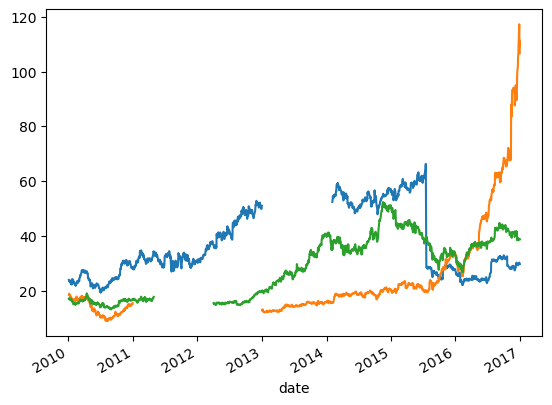

In [8]:
prices_null = pd.read_csv('Downloads/prices_null.csv',index_col=0, parse_dates = False)
print(prices_null)
prices_null.asfreq('D')
prices_null.index = pd.to_datetime(prices_null.index)
# Visualize the dataset
prices_null.plot(legend = False)

# Count the missing values of each time series
miss = prices_null.isnull().sum()
print(miss)

## Imputing missing values
When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (interpolate_and_plot()) you'll use to interpolate missing data points and plot them.

In [9]:
def interpolate_and_plot(prices, interpolation):
    # Create a boolean mask for missing values
    missing = prices.isna()
    
    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)
    
    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize= (10,5))
    prices_interp.plot(color='k', alpha=0.6, ax=ax, legend =False)
    
    # plot the interpolated values on top in red
    prices_interp[missing].plot(color='r', alpha =0.6, ax=ax,lw=3, legend =False)

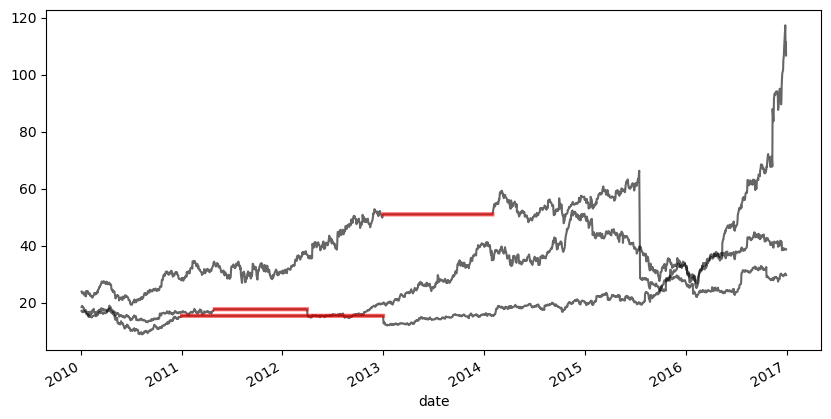

In [10]:
# Interpolate using the latest non-missing value
interpolation_type ='zero'
interpolate_and_plot(prices_null, interpolation_type)

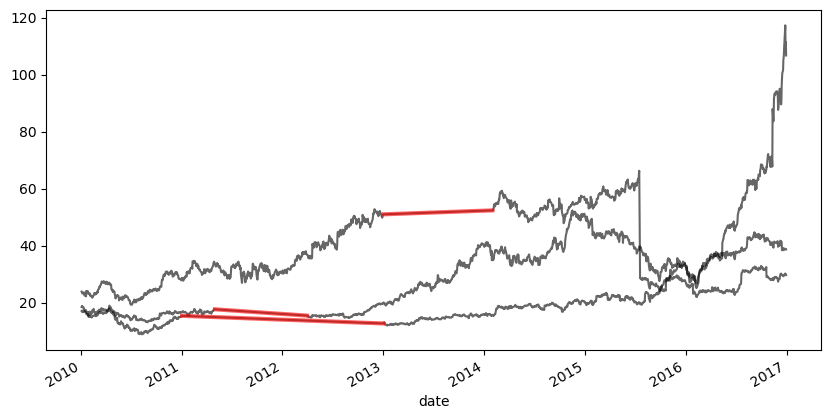

In [11]:
# Interpolate using the latest non-missing value
interpolation_type = 'linear'
interpolate_and_plot(prices_null, interpolation_type)

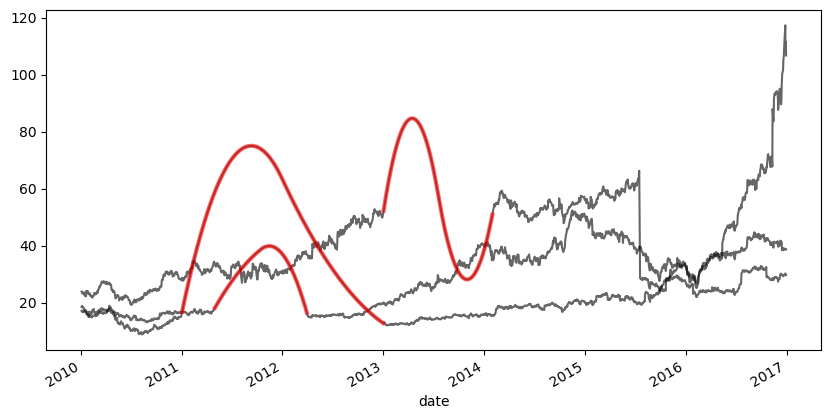

In [12]:
# Interpolate using the latest non-missing value
interpolation_type = 'quadratic'
interpolate_and_plot(prices_null, interpolation_type)

## Transforming raw data
In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

                EBAY      NVDA      YHOO
date                                    
2010-01-04       NaN       NaN       NaN
2010-01-05       NaN       NaN       NaN
2010-01-06       NaN       NaN       NaN
2010-01-07       NaN       NaN       NaN
2010-01-08       NaN       NaN       NaN
...              ...       ...       ...
2016-12-23  0.024842  0.147720 -0.038006
2016-12-27  0.038030  0.216063 -0.027985
2016-12-28  0.026925  0.117737 -0.029311
2016-12-29  0.021850  0.129669 -0.028632
2016-12-30  0.007285  0.068559 -0.026603

[1762 rows x 3 columns]


<Axes: xlabel='date'>

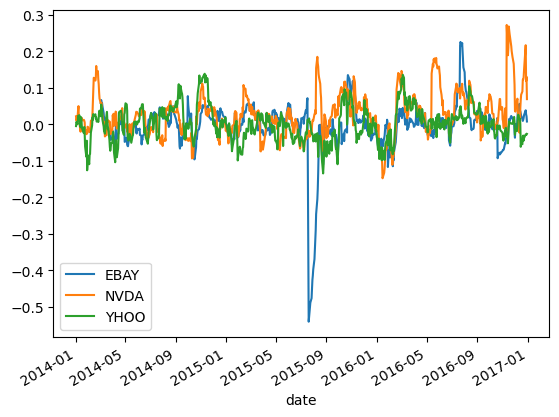

In [13]:
import numpy as np
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]
    
     # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value-np.mean(previous_values))/np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices_null.rolling(20).apply(percent_change)
print(prices_perc)
prices_perc.loc['2014':'2016'].plot()

## Handling outliers
In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

<Axes: xlabel='date'>

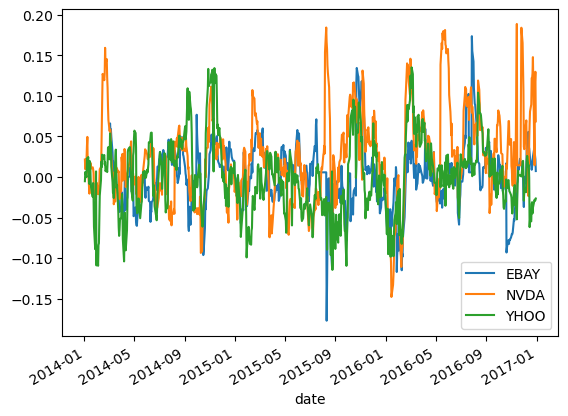

In [14]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    abs_diff_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the difference that are > 3 standard deviations from zero
    this_mask = abs_diff_mean > (np.std(series)*3)
    
    # Replace these values with the median across the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing functino to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc['2014':'2016'].plot()

## Creating features over time
Calculating "date-based" features

- Thus far we've focused on calculating "statistical" features - these are features that correspond statistical properties of the data, like "mean" , "standard deviation", etc
- However, don't forget the timeseries data oftenhas more "human" features associated with it, like days of the week, holidays, etc.
- These features are often useful when dealing with timeseries data that spans multiple years (such as stock value over time)

## Engineering multiple rolling features at once
Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.

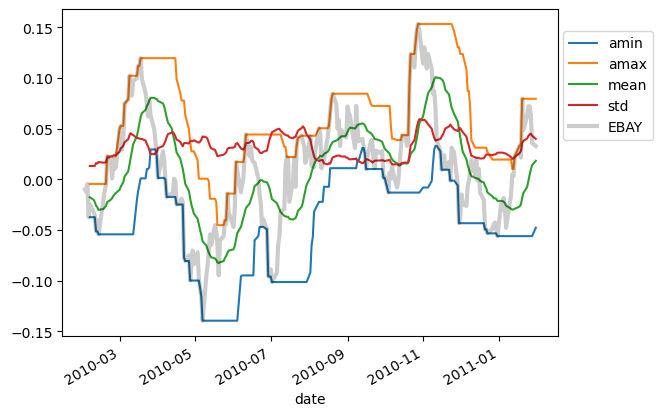

In [15]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_per_rolling = prices_perc['EBAY'].rolling(20, min_periods =5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_per_rolling.aggregate(features_to_calculate)

# Plot the results
ax =features.loc[:'2011-01'].plot()
prices_perc['EBAY'].loc[:'2011-01'].plot(ax=ax, color='k', alpha =0.2, lw =3)
ax.legend(loc=(1.01,0.6))

## Percentiles and partial functions
In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same percentile() function in numpy.

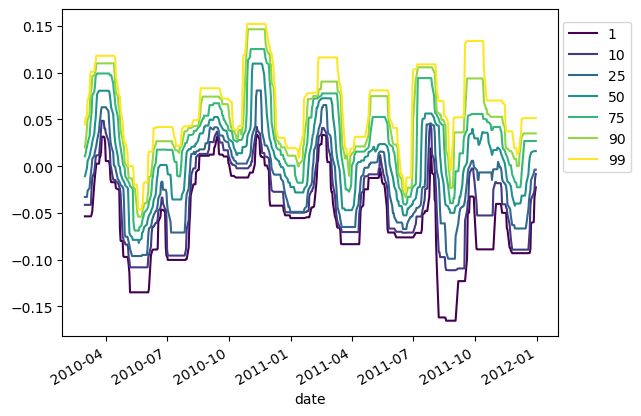

In [16]:
from functools import partial

percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantil
percentile_func = [partial(np.percentile, q = percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods =5, closed ='right')
feature_percentiles = prices_perc_rolling.aggregate(percentile_func)

# Plot a subset of the result
ax = feature_percentiles.loc[:'2011'].plot(cmap = plt.cm.viridis)
ax.legend(percentiles,loc=(1.01, 0.5))

## Using "date" information
It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In [17]:
prices_perc.index = pd.to_datetime(prices_perc.index)

# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
prices_perc['week_of_year'] = prices_perc.index.weekofyear
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

                EBAY      NVDA      YHOO  day_of_week  week_of_year  \
date                                                                  
2010-01-04       NaN       NaN       NaN            0             1   
2010-01-05       NaN       NaN       NaN            1             1   
2010-01-06       NaN       NaN       NaN            2             1   
2010-01-07       NaN       NaN       NaN            3             1   
2010-01-08       NaN       NaN       NaN            4             1   
...              ...       ...       ...          ...           ...   
2016-12-23  0.024842  0.147720 -0.038006            4            51   
2016-12-27  0.038030  0.014446 -0.027985            1            52   
2016-12-28  0.026925  0.117737 -0.029311            2            52   
2016-12-29  0.021850  0.129669 -0.028632            3            52   
2016-12-30  0.007285  0.068559 -0.026603            4            52   

            month_of_year  
date                       
2010-01-04          

C:\Users\Ravi\AppData\Local\Temp\ipykernel_15888\902910659.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  prices_perc['week_of_year'] = prices_perc.index.weekofyear


## Creating features from the past

- The past is useful
   - Timeseries data almost always have information that is shared between timepoints
   - Information in the past can help predict what happens in the future
   - Often the features best-suited to predict a timeseries are previous values of the same timeseries
- A note on smoothness and auto-correlation
   - A common question to ask of a timeseries: how smooth is the data.
   - AKA, how correlated is a timepoint with its neighboring timepoints (called autocorrelation)
   - The amount of auto-correlation in data will impact your models.

## Creating time-shifted features
In machine learning for time series, it's common to use information about previous time points to predict a subsequent time point.

In this exercise, you'll "shift" your raw data and visualize the results. You'll use the percent change time series that you calculated in the previous chapter, this time with a very short window. A short window is important because, in a real-world scenario, you want to predict the day-to-day fluctuations of a time series, not its change over a longer window of time.

In [18]:
prices_nyse = pd.read_csv('Downloads/prices_nyse.csv', index_col = 0, parse_dates =True)
prices_nyse.head()
prices = prices_nyse[['AAPL']]
prices

,AAPL
time,
2010-01-04,214.009998
2010-01-05,214.379993
2010-01-06,210.969995
2010-01-07,210.580000
2010-01-08,211.980005
...,...
2016-12-23,116.519997
2016-12-27,117.260002
2016-12-28,116.760002


In [19]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]
    
    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the difference that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median across the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)

# Apply your preprocessing functino to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)

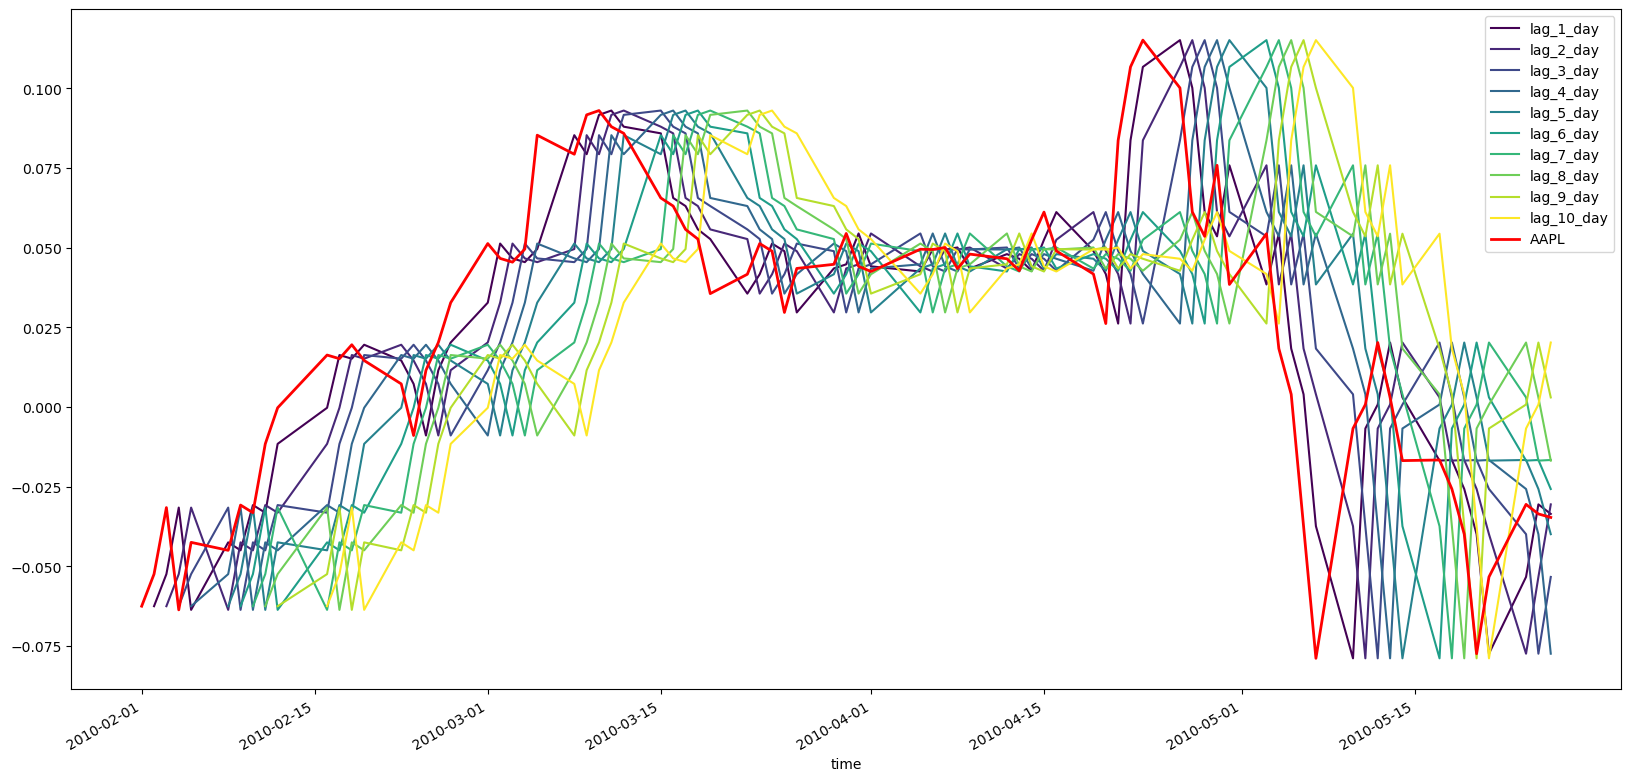

In [20]:
# These are the "time lags"
shifts = np.arange(1,11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {'lag_{}_day'.format(day_shift):
               prices_perc['AAPL'].shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

# Plot the first 100 samples of each
fig, ax = plt.subplots(figsize =(20,10))
prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis, ax=ax)
prices_perc.iloc[:100].plot(color ='r', lw=2, ax=ax)
ax.legend(loc='best')

## Special case: Auto-regressive models
Now that you've created time-shifted versions of a single time series, you can fit an auto-regressive model. This is a regression model where the input features are time-shifted versions of the output time series data. You are using previous values of a timeseries to predict current values of the same timeseries (thus, it is auto-regressive).

By investigating the coefficients of this model, you can explore any repetitive patterns that exist in a timeseries, and get an idea for how far in the past a data point is predictive of the future.

In [21]:
from sklearn.linear_model import Ridge

# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc['AAPL'].fillna(np.nanmedian(prices_perc['AAPL']))

model = Ridge()
model.fit(X,y)

Ridge()

## Visualize regression coefficients
Now that you've fit the model, let's visualize its coefficients. This is an important part of machine learning because it gives you an idea for how the different features of a model affect the outcome.

In this exercise, you will create a function that, given a set of coefficients and feature names, visualizes the coefficient values.

In [22]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel = 'Coefficient value')
    
     # set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.tight_layout
    return ax

<Axes: xlabel='Coefficient name', ylabel='Coefficient value'>

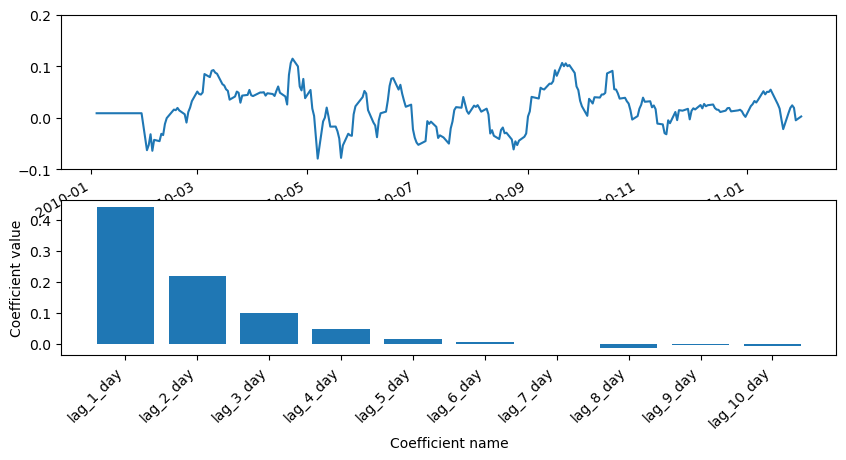

In [23]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2,1,figsize=(10,5))
y.loc[:'2011-01'].plot(ax=axs[0], ylim = (-0.1,0.2))

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1])

## Auto-regression with a smoother time series
Now, let's re-run the same procedure using a smoother signal. You'll use the same percent change algorithm as before, but this time use a much larger window (40 instead of 20). As the window grows, the difference between neighboring timepoints gets smaller, resulting in a smoother signal. What do you think this will do to the auto-regressive model?

<Axes: xlabel='Coefficient name', ylabel='Coefficient value'>

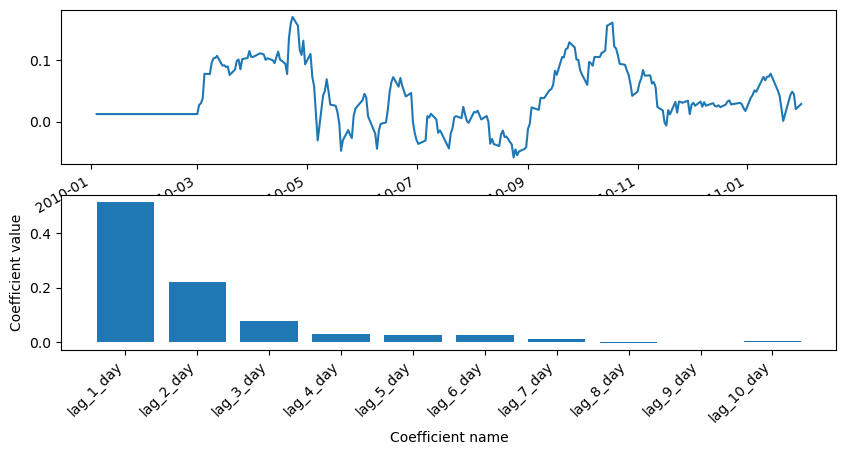

In [24]:
# Apply your custom function and plot
prices_perc = prices.rolling(40).apply(percent_change)

# Apply your preprocessing functino to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): 
                prices_perc['AAPL'].shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc['AAPL'].fillna(np.nanmedian(prices_perc['AAPL']))

# Fit the model
model = Ridge()
model.fit(X, y)

# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:"2011-01"].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1])

As you can see here, by transforming your data with a larger window, you've also changed the relationship between each timepoint and the ones that come just before it. This model's coefficients gradually go down to zero, which means that the signal itself is smoother over time. Be careful when you see something like this, as it means your data is not i.i.d.

## Cross-validating time series data
### Cross-validation with shuffling
As you'll recall, cross-validation is the process of splitting your data into training and test sets multiple times. Each time you do this, you choose a different training and test set. In this exercise, you'll perform a traditional ShuffleSplit cross-validation on the company value data from earlier. Later we'll cover what changes need to be made for time series data. The data we'll use is the same historical price data for several large companies.

In [25]:
X = pd.read_csv('Downloads/stock_10x.csv').to_numpy()
y = pd.read_csv('Downloads/stock_10y.csv').to_numpy()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model =LinearRegression()


In [26]:
def visualize_predictions(results):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

    # Loop through our model results to visualize them
    for ii, (prediction, score, indices) in enumerate(results):
        # Plot the predictions of the model in the order they were generated
        offset = len(prediction) * ii
        axs[0].scatter(np.arange(len(prediction)) + offset, prediction, 
                       label='Iteration {}'.format(ii))

        # Plot the predictions of the model according to how time was ordered
        axs[1].scatter(indices, prediction)
    axs[0].legend(loc="best")
    axs[0].set(xlabel="Test prediction number", title="Predictions ordered by test prediction number")
    axs[1].set(xlabel="Time", title="Predictions ordered by time")

ValueError: x and y must be the same size

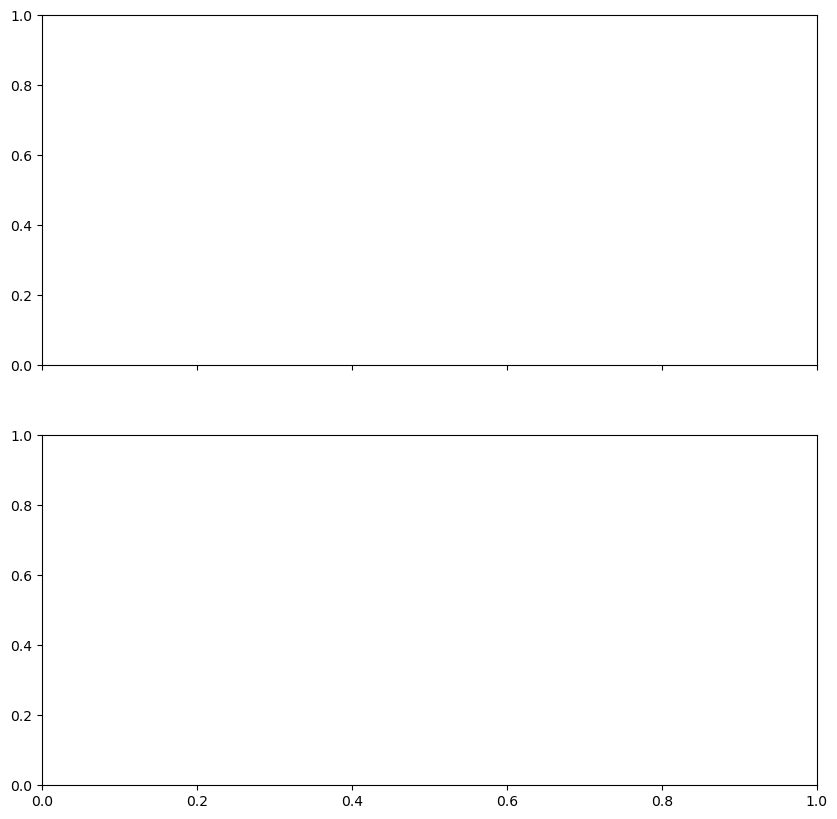

In [27]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X[tt])
    score = r2_score(y[tt], prediction)
    results.append((prediction, score, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

If you look at the plot to the right, see that the order of datapoints in the test set is scrambled. Let's see how it looks when we shuffle the data in blocks.

## Cross-validation without shuffling
Now, re-run your model fit using block cross-validation (without shuffling all datapoints). In this case, neighboring time-points will be kept close to one another. How do you think the model predictions will look in each cross-validation loop?

In [ ]:
# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(X[tt])
    results.append((prediction, _, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

This time, the predictions generated within each CV loop look 'smoother' than they were before - they look more like a real time series because you didn't shuffle the data. This is a good sanity check to make sure your CV splits are correct.

## Time-based cross-validation
Finally, let's visualize the behavior of the time series cross-validation iterator in scikit-learn. Use this object to iterate through your data one last time, visualizing the training data used to fit the model on each iteration.

[Text(0.5, 1.0, 'Training data on each CV iteration'),
 Text(0, 0.5, 'CV iteration')]

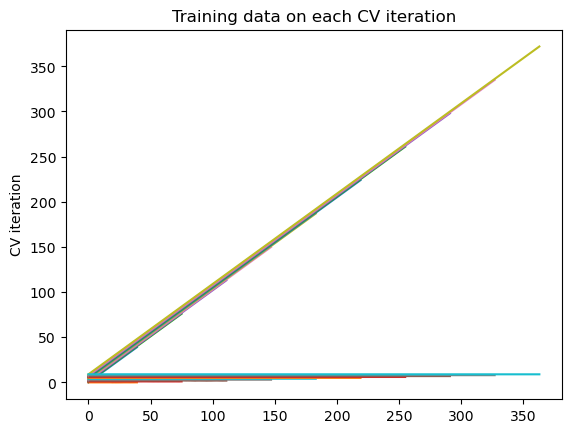

In [30]:
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr]);
    
ax.set(title='Training data on each CV iteration', ylabel='CV iteration')

## Stationarity and stability

- Stationarity
   - Stationarity time series do not change their statistical properties over time
        - E.g. mean, standard deviation, trends
   - Most time series are non-stationary to some extent
 - Model stability
   - Non-stationary data results in variability in our model
   - The statistical properties the model finds may change with the data
   - In addition, we will be less certain about the correct values of model parameters
   - How can we quantify this?
- Cross validation to quantify parameter stability
   - One approach: use cross-validation
   - Calculate model parameters on each iteration
   - Assess parameter stability across all CV splits
- Bootstrapping the mean
  - Bootstrapping is a common way to assess variability
   - The bootstrap:
     - Take a random sample of data with replacement
     - Calculate the mean of the sample
     - Repeat this process many times (1000s)
     - Calculate the percentiles of the result (usually 2.5, 97.5)
   - The result is a 95% confidence interval of the mean of each coefficient.
 - Assessing model performance stability
    - If using the TimeSeriesSplit, can plot the model's score over time
    - This is useful in finding certain regions of time that hurt the score
    - Also useful to find non-stationary signals

## Bootstrapping a confidence interval

A useful tool for assessing the variability of some data is the bootstrap. In this exercise, you'll write your own bootstrapping function that can be used to return a bootstrapped confidence interval.

This function takes three parameters: a 2-D array of numbers (data), a list of percentiles to calculate (percentiles), and the number of boostrap iterations to use (n_boots). It uses the resample function to generate a bootstrap sample, and then repeats this many times to calculate the confidence interval.

In [31]:
from sklearn.utils import resample

def bootstrap_interval(data, percentiles = (2.5, 97.5), n_boots =100):
    """Bootstrap a confidence interval for the mean of columns of a 1- or 2-D dataset."""
    # Create our empty array we'll fill with the results
    if data.ndim == 1:
        data = data[:,np.newaxis]
        data = np.atleast_2d(data)
    bootstrap_means = np.zeros(n_boots, data.shape[-1])
    for ii in range(n_boots):
        # Generate random indices for our data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[ii] = random_sample.mean(axis =0)
        
    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis =0)
    return percentiles

## Calculating variability in model coefficients
In this lesson, you'll re-run the cross-validation routine used before, but this time paying attention to the model's stability over time. You'll investigate the coefficients of the model, as well as the uncertainty in its predictions.

Begin by assessing the stability (or uncertainty) of a model's coefficients across multiple CV splits. Remember, the coefficients are a reflection of the pattern that your model has found in the data.

In [32]:
X = pd.read_csv('Downloads/stock_12x.csv', index_col =0).to_numpy()
y = pd.read_csv('Downloads/stock_12y.csv', index_col =0).to_numpy()

feature_names = np.array(['AAPL_lag_1_day', 'YHOO_lag_1_day', 'NVDA_lag_1_day', 'AAPL_lag_2_day',
       'YHOO_lag_2_day', 'NVDA_lag_2_day', 'AAPL_lag_3_day', 'YHOO_lag_3_day',
       'NVDA_lag_3_day', 'AAPL_lag_4_day', 'YHOO_lag_4_day', 'NVDA_lag_4_day'])

times_scores = pd.DatetimeIndex(['2010-04-05', '2010-04-28', '2010-05-21', '2010-06-16',
               '2010-07-12', '2010-08-04', '2010-08-27', '2010-09-22',
               '2010-10-15', '2010-11-09', '2010-12-03', '2010-12-29',
               '2011-01-24', '2011-02-16', '2011-03-14', '2011-04-06',
               '2011-05-02', '2011-05-25', '2011-06-20', '2011-07-14',
               '2011-08-08', '2011-08-31', '2011-09-26', '2011-10-19',
               '2011-11-11', '2011-12-07', '2012-01-03', '2012-01-27',
               '2012-02-22', '2012-03-16', '2012-04-11', '2012-05-04',
               '2012-05-30', '2012-06-22', '2012-07-18', '2012-08-10',
               '2012-09-05', '2012-09-28', '2012-10-23', '2012-11-19',
               '2012-12-13', '2013-01-09', '2013-02-04', '2013-02-28',
               '2013-03-25', '2013-04-18', '2013-05-13', '2013-06-06',
               '2013-07-01', '2013-07-25', '2013-08-19', '2013-09-12',
               '2013-10-07', '2013-10-30', '2013-11-22', '2013-12-18',
               '2014-01-14', '2014-02-07', '2014-03-05', '2014-03-28',
               '2014-04-23', '2014-05-16', '2014-06-11', '2014-07-07',
               '2014-07-30', '2014-08-22', '2014-09-17', '2014-10-10',
               '2014-11-04', '2014-11-28', '2014-12-23', '2015-01-20',
               '2015-02-12', '2015-03-10', '2015-04-02', '2015-04-28',
               '2015-05-21', '2015-06-16', '2015-07-10', '2015-08-04',
               '2015-08-27', '2015-09-22', '2015-10-15', '2015-11-09',
               '2015-12-03', '2015-12-29', '2016-01-25', '2016-02-18',
               '2016-03-14', '2016-04-07', '2016-05-02', '2016-05-25',
               '2016-06-20', '2016-07-14', '2016-08-08', '2016-08-31',
               '2016-09-26', '2016-10-19', '2016-11-11', '2016-12-07'], name='date')

model = LinearRegression()

In [33]:
# Iterate through CV splits
n_splits = 100
cv = TimeSeriesSplit(n_splits)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Fit the model on training data and collect the coefficients
    model.fit(X[tr], y[tr])
    coefficients[ii] = model.coef_

In [34]:
# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients)

# Plot it
fig, ax = plt.subplots()
ax.scatter(feature_names, bootstrapped_interval[0], marker='_', lw=3);
ax.scatter(feature_names, bootstrapped_interval[1], marker='_', lw=3);
ax.set(title='95% confidence interval for model coefficients');
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

TypeError: Cannot interpret '12' as a data type

## Visualizing model score variability over time
Now that you've assessed the variability of each coefficient, let's do the same for the performance (scores) of the model. Recall that the TimeSeriesSplit object will use successively-later indices for each test set. This means that you can treat the scores of your validation as a time series. You can visualize this over time in order to see how the model's performance changes over time.

In [35]:
def my_pearsonr(est, X, y):
    # Generate predictions and convert to a vector
    y_pred = est.predict(X).squeeze()
    
    # Use the numpy "corrcoef" function to calculate a correlation matrix
    my_corrcoef_matrix = np.corrcoef(y_pred, y.squeeze())
    
    # Return a single correlation value from the matrix
    my_corrcoef = my_corrcoef_matrix[1, 0]
    return my_corrcoef

In [36]:
from sklearn.model_selection import cross_val_score
from functools import partial

# Generate scores for each split to see how the model performs over time
scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)

# Convert to a Pandas Series object
scores_series = pd.Series(scores, index=times_scores, name='score')

# Bootstrap a rolling confidence interval for the mean score
scores_lo = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=2.5))
scores_hi = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=97.5))

C:\Users\Ravi\AppData\Local\Temp\ipykernel_15888\2843226625.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data = data[:,np.newaxis]


TypeError: Cannot interpret '1' as a data type

NameError: name 'scores_lo' is not defined

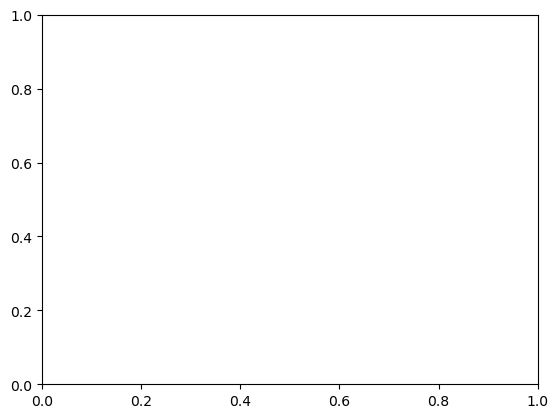

In [37]:
# Plot the results
fig, ax = plt.subplots()
scores_lo.plot(ax=ax, label='Lower confidence interval');
scores_series.plot(ax=ax, label='scores')
scores_series.rolling(20).mean().plot(ax=ax, label='rolling mean')
scores_hi.plot(ax=ax, label='Upper confidence interval');
ax.legend();

## Accounting for non-stationarity
In this exercise, you will again visualize the variations in model scores, but now for data that changes its statistics over time.

In [38]:
# Pre-initialize window sizes
window_sizes = [25, 50, 75, 100]

# Create an empty DataFrame to collect the stores
all_scores = pd.DataFrame(index=times_scores)

# Generate scores for each split to see how the model performs over time
for window in window_sizes:
    # Create cross-validation object using a limited lookback window
    cv = TimeSeriesSplit(n_splits=100, max_train_size=window)
    
    # Calculate scores across all CV splits and collect them in a DataFrame
    this_scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)
    all_scores['Length {}'.format(window)] = this_scores

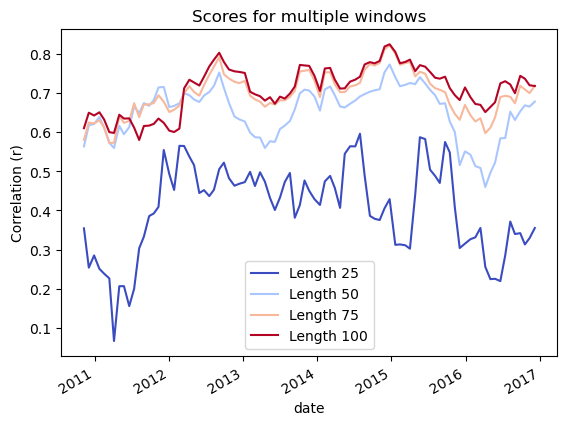

In [39]:
# Visualize the scores
ax = all_scores.rolling(10).mean().plot(cmap=plt.cm.coolwarm);
ax.set(title='Scores for multiple windows', ylabel='Correlation (r)');

## Wrap-up
Timeseries and machine learning

Many applications of time series + machine learning

Always visualize your data first

Feature extraction and classification

Summary statistics for time series classification

Combining multiple features into a single input matrix

Feature extraction for time series data

Model fitting and improving data quality

Time series features for regression

Generating predictions over time

Cleaning and improving time series data

Validating and assessing our model performance

Cross-validation with time series data (don't shuffle the data!)

Time series stationary


Assessing model coefficient and score stability

Advanced concepts in time series

Advanced window functions

Signal processing and filtering details

Spectral Analysis

Advanced machine learning

Advanced time series feature extraction (e.g., tsfresh)

More complex model architectures for regression and classification

Production-ready pipelines for time series analysis